In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#laoding dataset
df=pd.read_csv('D:\\PYTHON\\INeuron Challange\\CardioVascularDisease\\cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 13)

In [5]:
# Reading about data and its features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Checking for missing values

In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

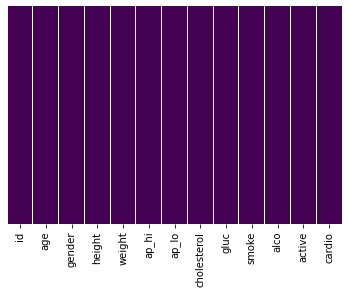

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

So there is no missing values in this data

# Now halding Outliers 

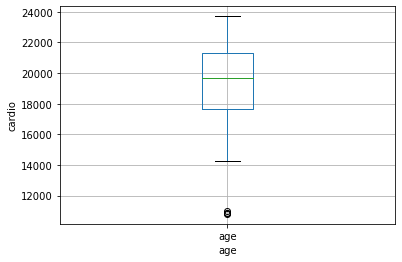

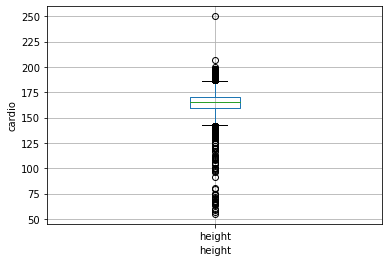

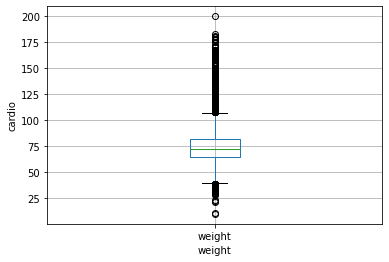

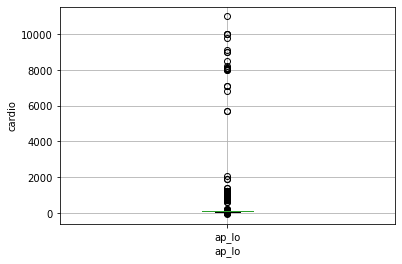

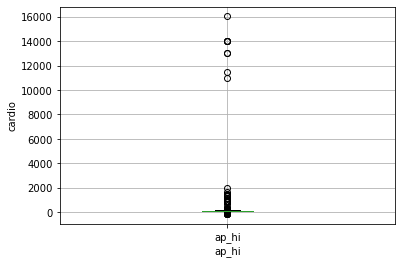

In [9]:
for feature in df[['age','height','weight','ap_lo','ap_hi']]:
        df.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.show()

In [10]:
#Avoiding outliers

In [11]:
df1=df.loc[df['height']>140]

In [12]:
df2=df1.loc[df1['weight']<105]

In [13]:
df3=df2.loc[df2['ap_lo']<100]

In [14]:
df4=df3.loc[df3['ap_hi']<140]

In [15]:
df4.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000,48405.000000
mean,50423.270613,19236.669270,1.337775,164.481934,71.288888,117.929573,77.726268,1.280777,1.192666,0.082884,0.048983,0.802934,0.363578
std,28581.821105,2486.192935,0.472956,7.581842,11.667639,10.962027,7.255275,0.610607,0.536750,0.275710,0.215834,0.397787,0.481034
min,988.000000,10798.000000,1.000000,141.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25675.000000,17459.000000,1.000000,159.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50434.000000,19555.000000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75127.000000,21187.000000,2.000000,170.000000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,207.000000,104.000000,139.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df5=df4.loc[df4['ap_lo']>50]

In [17]:
df6=df5.loc[df5['ap_hi']>100]

In [18]:
df6.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,44618.000000,44618.000000,44618.000000,44618.00000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000
mean,50411.264243,19320.083554,1.347685,164.68190,71.727373,120.026155,78.675109,1.284459,1.195459,0.083083,0.049307,0.803129,0.377740
std,28582.775262,2468.229183,0.476241,7.54269,11.500000,6.301277,6.090579,0.617807,0.542528,0.276011,0.216512,0.397639,0.484828
min,988.000000,10859.000000,1.000000,141.00000,11.000000,101.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25649.500000,17540.000000,1.000000,160.00000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50402.500000,19622.500000,1.000000,165.00000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75119.250000,21223.000000,2.000000,170.00000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.00000,104.000000,139.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#after avoiding outliers we have dataset as df6

In [20]:
#Now we are plotting heatmap to for correlation of every feature

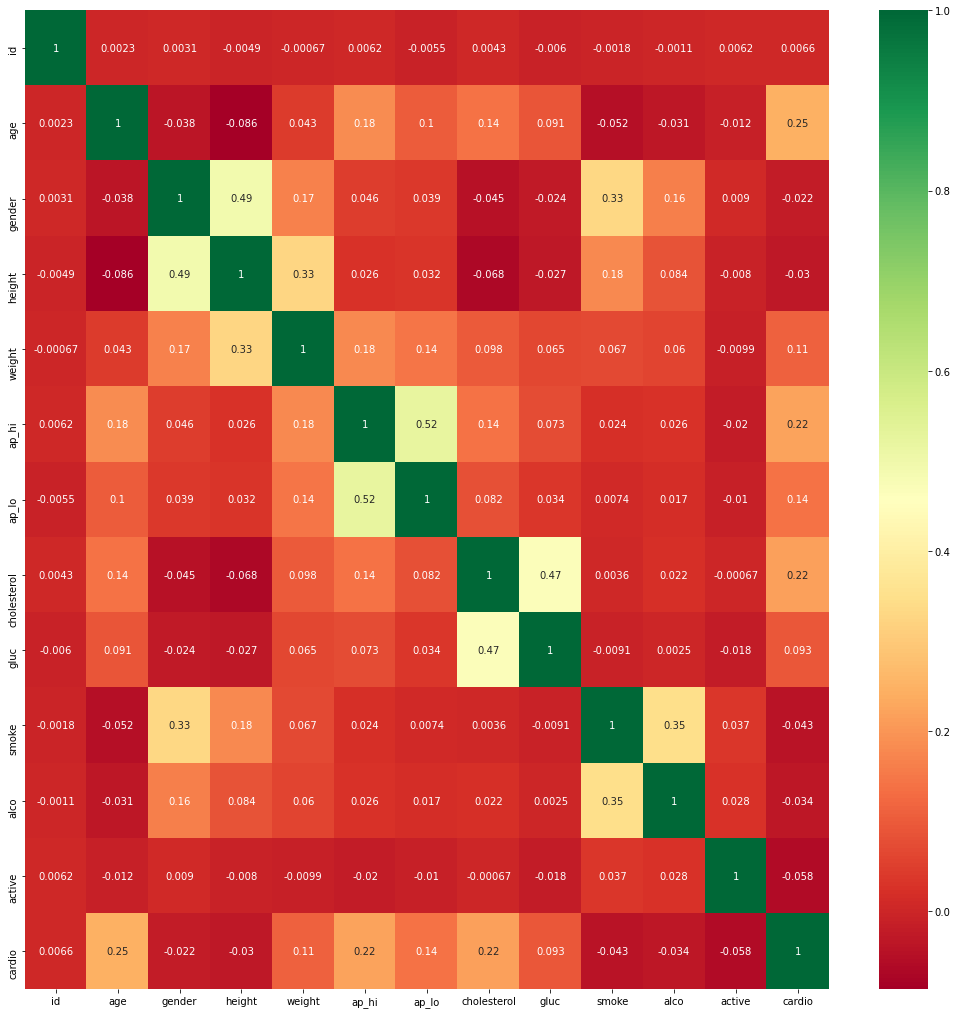

In [21]:
corrmat = df6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(df6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
#checking for categorical features

In [23]:
df6['smoke'].value_counts()

0    40911
1     3707
Name: smoke, dtype: int64

In [24]:
df6['alco'].value_counts()

0    42418
1     2200
Name: alco, dtype: int64

In [25]:
df6['cardio'].value_counts()

0    27764
1    16854
Name: cardio, dtype: int64

### considering only those feature which are important to train the model as observed in heatmap correlation 


In [26]:
x=df6[['age','weight','ap_hi','ap_lo','cholesterol','gluc']]

In [27]:
y=df6['cardio']

## #training model with hyper-parameter tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,None],
              'n_estimators':[100,200],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, x, y)




In [29]:
rf_ht_score

0.6807790103672001

In [30]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [31]:
est1 = RandomForestClassifier(n_jobs=-1,bootstrap=True,criterion='entropy',max_depth=5,max_features=2
                              ,min_samples_leaf=2,n_estimators=200)

In [32]:
est1.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
#importing library for k-fold cross validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
score=cross_val_score(est1,x,y,cv=10)

In [36]:
score.mean()

0.6797929131510896

In [37]:
# Now adding BMI feature 
df6["bmi"] = df6["weight"]/ (df6["height"]/100)**2

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
df6.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,44618.000000,44618.000000,44618.000000,44618.00000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000,44618.000000
mean,50411.264243,19320.083554,1.347685,164.68190,71.727373,120.026155,78.675109,1.284459,1.195459,0.083083,0.049307,0.803129,0.377740,26.488949
std,28582.775262,2468.229183,0.476241,7.54269,11.500000,6.301277,6.090579,0.617807,0.542528,0.276011,0.216512,0.397639,0.484828,4.243877
min,988.000000,10859.000000,1.000000,141.00000,11.000000,101.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25649.500000,17540.000000,1.000000,160.00000,64.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.530366
50%,50402.500000,19622.500000,1.000000,165.00000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,25.636917
75%,75119.250000,21223.000000,2.000000,170.00000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,28.875440
max,99999.000000,23713.000000,2.000000,198.00000,104.000000,139.000000,99.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,46.844737


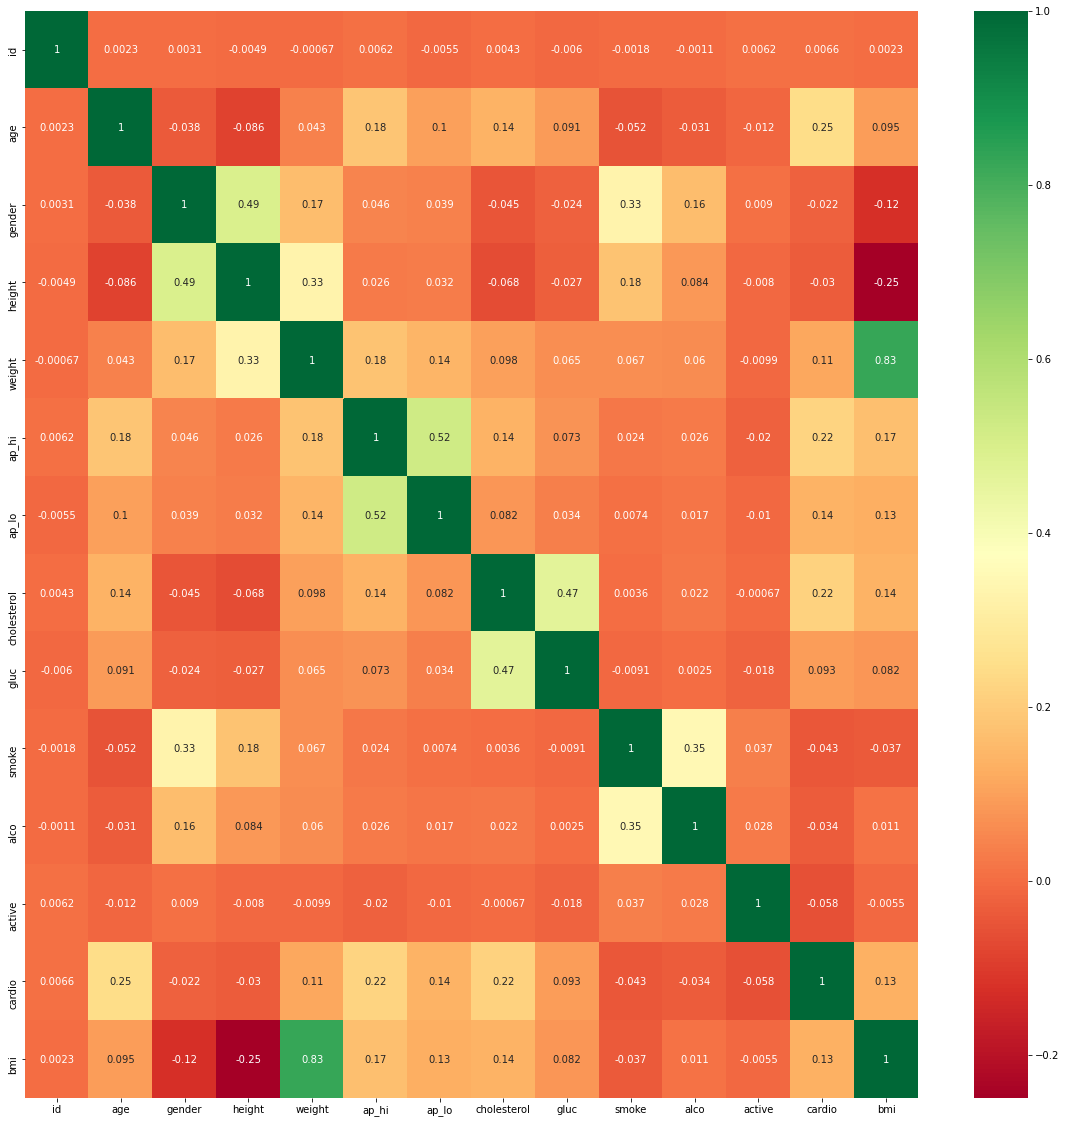

In [39]:
# fing correlation of bmi feature with target feature
corrmat = df6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df6[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
#considering bmi feature also to train the model
x1=df6[['age','weight','ap_hi','ap_lo','cholesterol','gluc','bmi']]

In [41]:
y1=df6['cardio']

In [42]:
#this time we are attempting through XGboost classifier
from  xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1,y1)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [43]:
#checking score with cross validation
score_XGB=cross_val_score(xgb,x1,y1,cv=10)

In [44]:
score_XGB.mean()

0.6799050609540866

In [45]:
#Now we are moving to get better accuracy

In [46]:
data=df.copy()
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [50]:
#Standardise Continuous feature 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [51]:
data[['age','height','weight','ap_lo','ap_hi']]=std.fit_transform(data[['age','height','weight','ap_lo','ap_hi']])

In [66]:
a=std.fit([[22469]])
print(a)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [67]:
b=std.transform([[22469]])
b

array([[0.]])

In [68]:
b.std(axis = 0)

array([0.])

In [55]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,1.216018,1,-1.140999,-0.361739,0.007562,-0.088052,2,2,0,0,1,0
1,989,-1.953915,1,-0.166017,-0.222690,-0.121658,-0.140935,1,1,0,0,1,1
2,990,0.985802,1,0.077728,-0.292214,-0.057048,-0.088052,1,1,0,0,1,0
3,991,-1.994041,2,0.077728,0.750657,-0.057048,-0.088052,1,1,1,1,1,0
4,992,1.590525,1,-1.140999,-0.848413,-0.057048,-0.088052,1,1,0,0,1,0


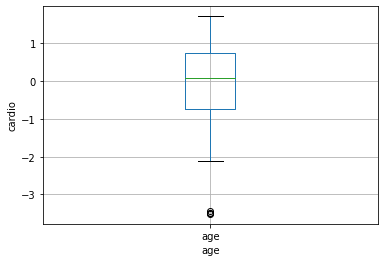

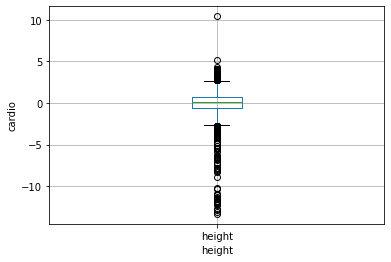

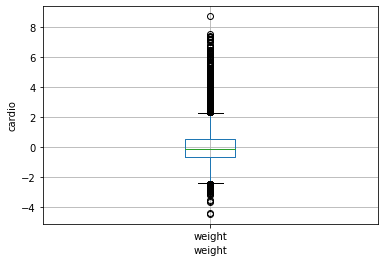

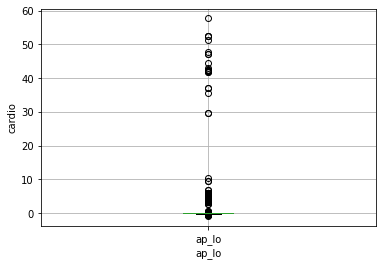

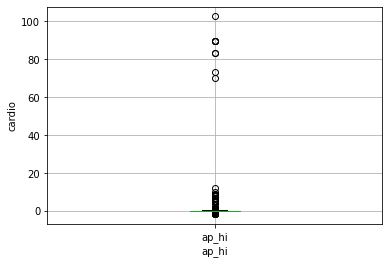

In [52]:
for feature in data[['age','height','weight','ap_lo','ap_hi']]:
        #df[feature]=np.log(df[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel('cardio')
        plt.show()

In [53]:
#Now from this plot we can compare for outliers

In [54]:
#avoiding outliers
data1=data.loc[data['height']>-0.5]

In [55]:
data2=data1.loc[data1['weight']<1]

In [56]:
data3=data2.loc[data2['ap_lo']<1]

In [57]:
data4=data3.loc[data3['ap_hi']<1]

In [58]:
data4.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000
mean,50297.291723,-0.062816,1.458961,0.474762,-0.188016,-0.025866,-0.084667,1.299354,1.193879,0.109808,0.057988,0.802983,0.458297
std,28570.592313,1.003922,0.498320,0.621929,0.593014,0.107329,0.049058,0.625450,0.539191,0.312655,0.233725,0.397750,0.498264
min,989.000000,-3.481936,1.000000,-0.409763,-4.394175,-1.801519,-0.881304,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25597.500000,-0.789864,1.000000,0.077728,-0.639838,-0.057048,-0.088052,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50176.000000,0.056830,1.000000,0.443347,-0.222690,-0.057048,-0.088052,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74976.500000,0.711001,2.000000,0.808965,0.263984,0.007562,-0.088052,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,1.720225,2.000000,10.436914,0.993994,0.718273,0.493667,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


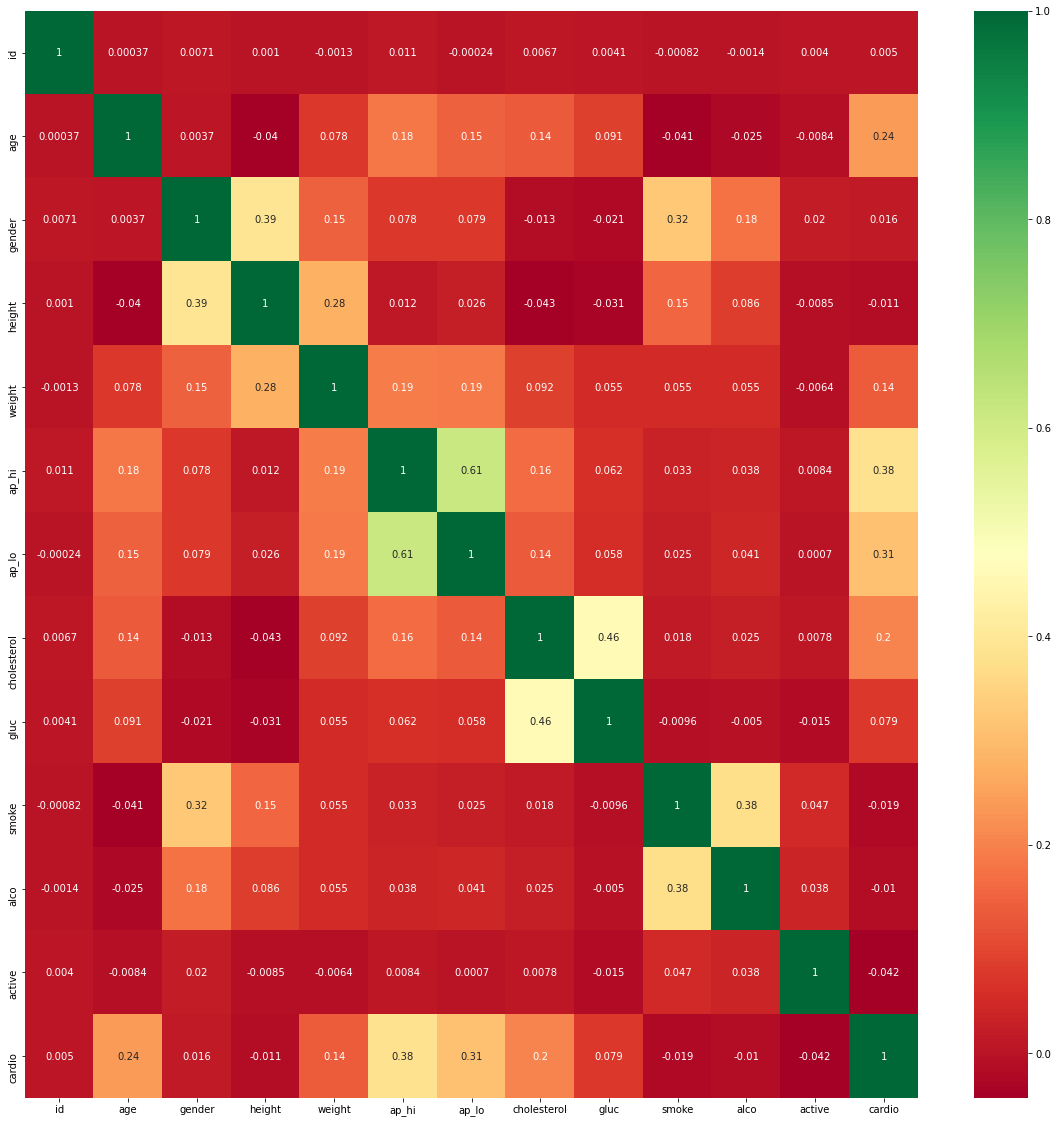

In [59]:
#now plotting correlation
corrmat = data4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data4[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [60]:
#Now again considering only important features 

In [61]:
#And Training our model with diffferent different algorithms

In [62]:
X=data4[['age','weight','ap_hi','ap_lo','cholesterol']]

In [63]:
Y=data4['cardio']

In [64]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est3 = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,None],
              'n_estimators':[100,200],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }
def hypertuning_rscv(est3, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est3, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est3, rf_p_dist, 10, X, Y)




In [65]:
rf_ht_score

0.7230863311265322

In [66]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [67]:
est3 = RandomForestClassifier(n_jobs=-1,bootstrap=False,criterion='entropy',max_depth=5,max_features=2
                              ,min_samples_leaf=1,n_estimators=200)

In [69]:
est3.fit(X,Y)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [70]:
score_est3=cross_val_score(est3,X,Y,cv=10)

In [71]:
score_est3.mean()

0.7239903124501287

In [72]:
##using KNN algorithm 

In [73]:
knn2=KNeighborsClassifier()

In [74]:
param={'n_neighbors':[12,14,11],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree'],
    'leaf_size':[30,40],
    'p':[2,1]}

In [75]:
from sklearn.model_selection import RandomizedSearchCV
rdmsearch = RandomizedSearchCV(knn2, param_distributions=param,
                                  n_jobs=-1, n_iter=20, cv=10)
    #CV = Cross-Validation ( here using Stratified KFold CV)
rdmsearch.fit(X,Y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': [30, 40],
                                        'n_neighbors': [12, 14, 11],
                                        'p': [2, 1],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=T

In [76]:
rdmsearch.best_params_, rdmsearch.best_score_

({'weights': 'uniform',
  'p': 1,
  'n_neighbors': 14,
  'leaf_size': 30,
  'algorithm': 'ball_tree'},
 0.7073996023148684)

In [80]:
knn2=KNeighborsClassifier(algorithm='ball_tree',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=14,
                                                  p=1, weights='uniform')

In [81]:
knn2.fit(X,Y)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=1,
                     weights='uniform')

In [82]:
score_knn2=cross_val_score(knn2,X,Y,cv=10)

In [83]:
score_knn2.mean()

0.7073996023148684

In [84]:
#creating another copy of our processed dataset 
dt4=data4.copy()

In [85]:
#adding another feature or bmi to this data to check for better accuracy
dt4["bmi"] = dt4["weight"]/ (dt4["height"]/100)**2

In [86]:
knn3=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=14,
                                                  p=1, weights='uniform')

In [87]:
x2=dt4.drop('cardio',axis=1)

In [88]:
y2=dt4['cardio']

In [89]:
knn3.fit(x2,y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=1,
                     weights='uniform')

In [90]:
score_knn3=cross_val_score(knn3,X,Y,cv=10)

In [91]:
score_knn3.mean()

0.7072135098730769

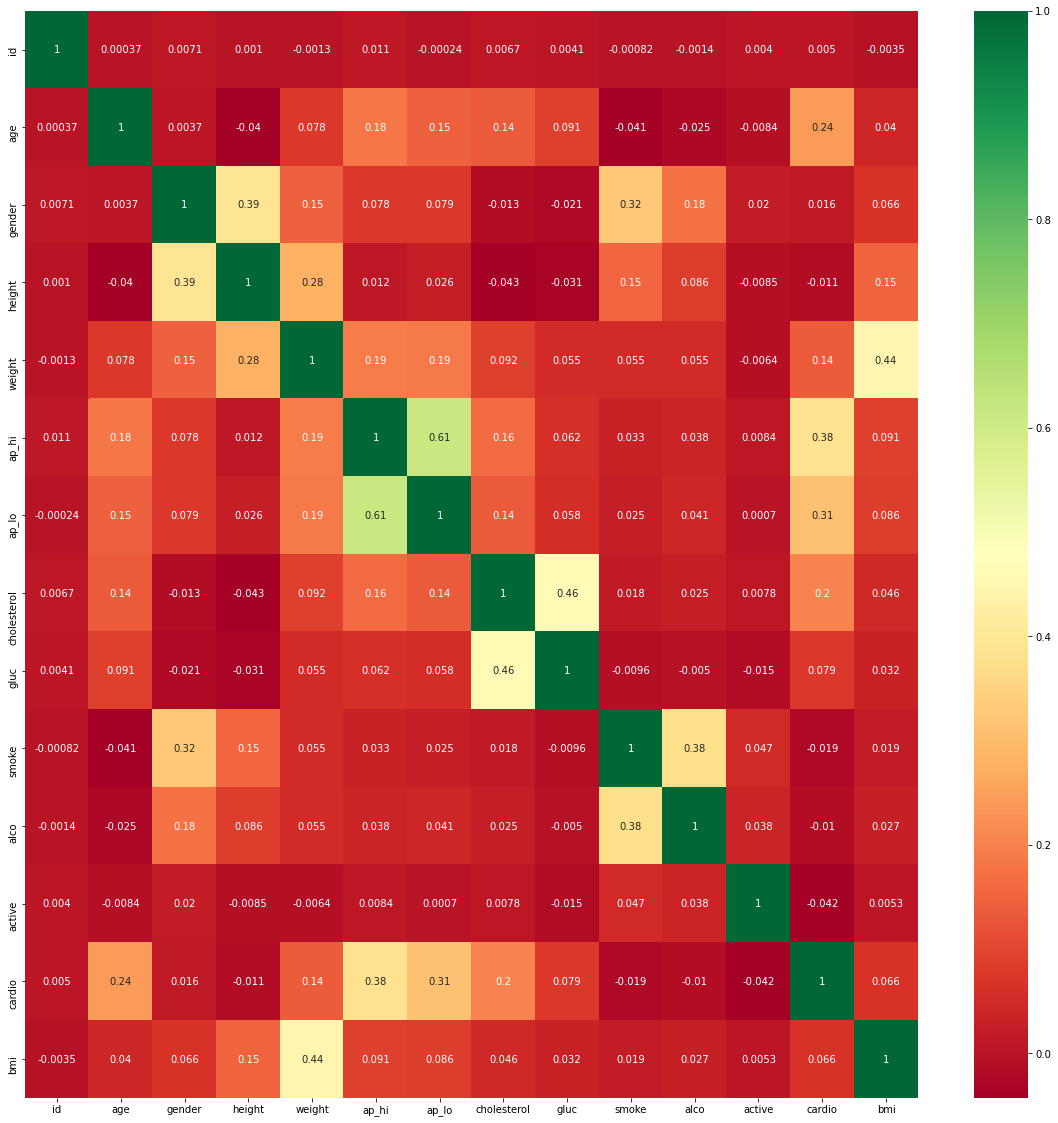

In [92]:
corrmat = dt4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dt4[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### from here we can conclude that bmi is not affacting that much for target feature

In [96]:
# checking with random forest again after adding bmi feature
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est4 = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,None],
              'n_estimators':[100,200],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),
              }
def hypertuning_rscv(est4, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est3, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est4, rf_p_dist, 10, x2, y2)




In [97]:
rf_ht_score

0.7201616548350216

In [98]:
rf_parameters

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [99]:
est4 = RandomForestClassifier(n_jobs=-1,bootstrap=False,criterion='entropy',max_depth=5,max_features=2
                              ,min_samples_leaf=1,n_estimators=200)

In [101]:
est4.fit(x2,y2)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [102]:
score_est4=cross_val_score(est4,x2,y2,cv=10)

In [103]:
score_est4.mean()

0.7177956887335692

In [104]:
#now using decision tree algorithm 
dct=DecisionTreeClassifier()

In [105]:
dct.fit(x2,y2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
score_dct=cross_val_score(dct,x2,y2,cv=10)

In [107]:
score_dct.mean()

0.6168164452852176

In [108]:
#using Support vector machine algorithm
from sklearn.svm import SVC
model=SVC()

In [109]:
model.fit(x2,y2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
score_svm=cross_val_score(model,x2,y2,cv=10) 

In [111]:
score_svm.mean()

0.5482172301670195

### After checking all these algorithm we can conclude that we are getting accuracy of approx 72.5% with random forest classier with hyper parameter tuning as we tried after standardise all those features

### so we are going to create model with that accuracy and dumping into a pickle file

In [112]:
import pickle

In [113]:
pickle.dump(est3,open('cardiovascular_disease.pkl','wb'))